"Download datasettet fra dette link.
https://www.kaggle.com/sanjeetsinghnaik/top-1000-highest-grossing-movies 

1. Find the top 10 highest grossing Disney movies measured by world sales

2. Create a pie chart that shows the distribution of Licenses (PG, R, M and so on)

3. Get the percentage of PG rated movies between 2001 and 2015

4. Calculate the average of world sales for each genre and visualize the data with a bar chart. (Hint: use groupBy)

Top 10 Disney movies (sales),Title,World Sales (in $)
1,Star Wars: Episode VII - The Force Awakens (2015),2069521700
2,Avengers: Infinity War (2018),2048359754
3,The Lion King (2019),1662899439
4,The Avengers (2012),1518815515
5,Frozen II (2019),1450026933
6,Avengers: Age of Ultron (2015),1402809540
7,Black Panther (2018),1347597973
8,Star Wars: Episode VIII - The Last Jedi (2017),1332698830
9,Frozen (2013),1281508100
10,Beauty and the Beast (2017),1273576220


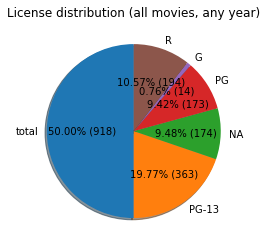

Between 2001 and 2015 22.92% of movie releases where PG rated.


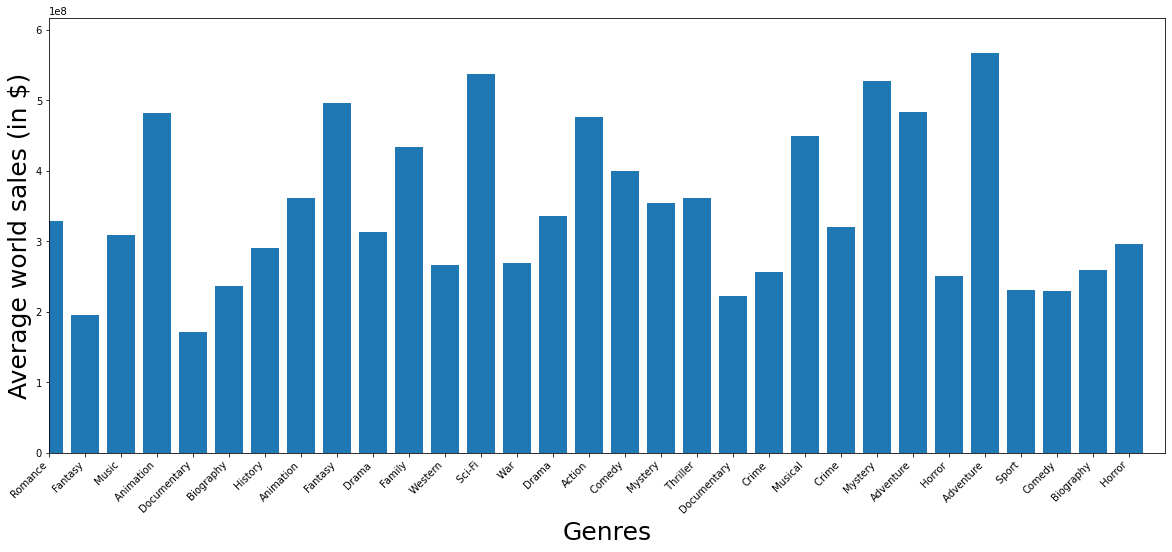

In [23]:
import csv
import pandas as pd
from operator import itemgetter
import matplotlib.pyplot as plt
import numpy as np
import dateutil.parser
import re

filename = '../data/Highest Holywood Grossing Movies.csv'

def getMovieList(file):
    reader = csv.DictReader(csvfile)
    movies = list(reader)
    for movie in movies:
        movie['World Sales (in $)'] = int(movie['World Sales (in $)'])
        if movie['Release Date'] != 'NA':
            movie['Release Date'] = dateutil.parser.parse(movie['Release Date'])
        genres = movie['Genre']
        genres = genres.replace(']','')
        genres = genres.replace('[','')
        genres = genres.replace('\'','')
        genres = genres.split(',')
        movie['Genre'] = genres
    return movies

def showTop10DisneyMovies(movies):
    def getDisneyMovies(movies):
        return [m for m in movies if m['Distributor'] == 'Walt Disney Studios Motion Pictures']
    
    def sortBySales(movies):
        return sorted(movies, key=itemgetter('World Sales (in $)'), reverse=True)

    top10DisneyMovies = sortBySales(getDisneyMovies(movies))[1:11]
    df = pd.DataFrame(top10DisneyMovies, index=range(1,11))
    df.columns.name ="Top 10 Disney movies (sales)"
    dfTop10 = df.filter(items=['Title','World Sales (in $)'])
    display(dfTop10)
    
def getLicenseCount(movies):
            licenses = {'total':0}
            for m in movies:
                licenses['total'] += 1
                license = m['License']
                if (license in licenses):
                    licenses[license] += 1
                else: 
                    licenses[license] = 1
            return licenses    

def showLicensePie(movies):
        
        data = getLicenseCount(movies)
        
        fig1, ax1 = plt.subplots()
        ax1.pie(
            data.values(), 
            labels=data.keys(), 
            autopct=lambda p:'{:.2f}% ({:.0f})'.format(p,(p/100)*sum(data.values())),
            shadow=True, 
            startangle=90
        )
        ax1.set_aspect('equal')
        ax1.set_title('License distribution (all movies, any year)')
        plt.show()
        
def showPgBetween(movies, startYear, stopYear):
    filteredMovies = []
    for m in movies:
        if (m['Release Date'] == "NA"):
            continue
        elif m['Release Date'].year >= startYear and m['Release Date'].year <= stopYear:
            filteredMovies.append(m)
    filteredLicenseCount = getLicenseCount(filteredMovies)
    percentage = round(filteredLicenseCount['PG']/filteredLicenseCount['total']*100,2)
    display = "Between " + str(startYear) + " and " + str(stopYear) + " " + str(percentage) + "% of movie releases where PG rated."
    print(display)
    
def calcAverageGenreSales(movies):
    genreSales = {}
    genreCount = {}
    for m in movies:
        for g in m['Genre']:
            if (g in genreSales):
                genreSales[g] += m['World Sales (in $)']
            else: 
                genreSales[g] = m['World Sales (in $)']
            if (g in genreCount):
                genreCount[g] += 1
            else: 
                genreCount[g] = 1
    genreAverage = {k: round(genreSales[k]/genreCount[k]) for k in genreSales.keys() & genreCount}
    return genreAverage

def showAverageGenreSales(movies):
    data = calcAverageGenreSales(movies)
    max_sales = max(data.values())
    plt.figure(figsize=(20,8))
    plt.bar(data.keys(),data.values(), align='center')
    plt.axis([0, len(data), 0, max_sales+50000000]) #axis(x-min, x-max, y-min, y-max)
    plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
    plt.xlabel("Genres", fontsize=25)
    plt.ylabel("Average world sales (in $)", fontsize=25)

with open(filename) as csvfile:
    movies = getMovieList(csvfile)
    showTop10DisneyMovies(movies)
    showLicensePie(movies)
    showPgBetween(movies, 2001,2015)
    showAverageGenreSales(movies)

    